In [1]:
from xgboost import XGBClassifier # 분류 트리를 만듬
from xgboost import plot_importance # 중요변수 시각화 해줌
from sklearn.datasets import make_blobs # 범주가 3개 클러스트 데이터셋
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split # dataset split
import matplotlib.pyplot as plt

# 1. dataset 생성
X,y = make_blobs(n_samples=2000,n_features=4,centers = 3,
           cluster_std=2.5,random_state=123)
print(X.shape) #(2000, 4)
print(y.shape) #(2000,)
'''
n_samples : 표본 데이터의 수(디폴트 100()
n_features : 독립 변수의 수(디폴트 20)
centers : 생성할 클러스터 수 또는 중심(디폴트 3), 
cluster_std: 클러스터의 표준 편차(디폴트 1.0 : 클 수록 클러스터 간 편차 심함)
'''

(2000, 4)
(2000,)


'\nn_samples : 표본 데이터의 수(디폴트 100()\nn_features : 독립 변수의 수(디폴트 20)\ncenters : 생성할 클러스터 수 또는 중심(디폴트 3), \ncluster_std: 클러스터의 표준 편차(디폴트 1.0 : 클 수록 클러스터 간 편차 심함)\n'

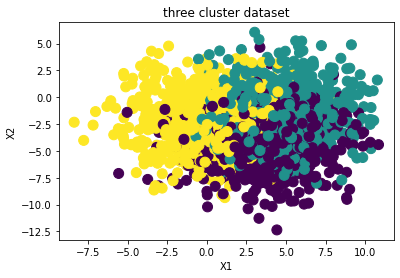

In [2]:
plt.title("three cluster dataset")
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


In [3]:
# 2. train/test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [4]:
# 3. XGBOOST model 
xgb = XGBClassifier()
# objective='binary:logistic' -> 0~1 확률값으로 class 분류(sigmoid) 
# train data 이용 model 생성 
model = xgb.fit(X_train, y_train)
print('XGB model =',model) # refined_XGB= XGBClassifier()


C:\Users\hyebin\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:29:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [11]:
# test data[train외 나머지] 이용 예측치 생성 
pred = model.predict(X_test) # 검증데이터

# 4. fscore 중요변수 시각화  
fscore = model.get_booster().get_fscore()
print("fscore:",fscore) 
# fscore: {'Petal.Length': 285, 'Petal.Width': 92, 'Sepal.Length': 64, 'Sepal.Width': 38}
print('len =', len(fscore))  # len = 4

fscore: {'f2': 890, 'f0': 798, 'f3': 761, 'f1': 727}
len = 4


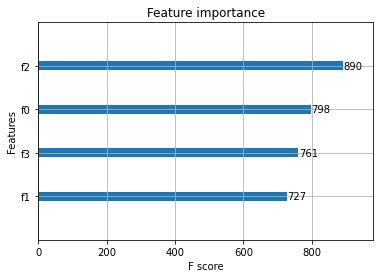

In [12]:
# 중요변수 시각화
plot_importance(model) # fscore 기준  내림차순 52변수 시각화 
plt.show()


In [14]:
# 5. 모델 평가 
acc = accuracy_score(y_test, pred)
print('분류정확도 =', acc,"\n")

report = classification_report(y_test, pred)
print('모델 평가 결과')
print(report)


분류정확도 = 0.9033333333333333 

모델 평가 결과
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       197
           1       1.00      0.99      1.00       209
           2       0.85      0.85      0.85       194

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600

